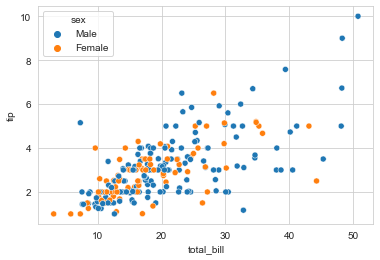

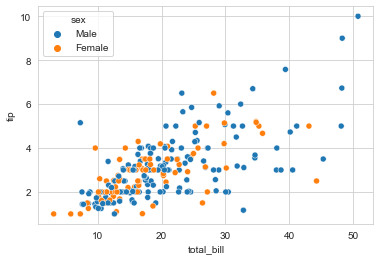

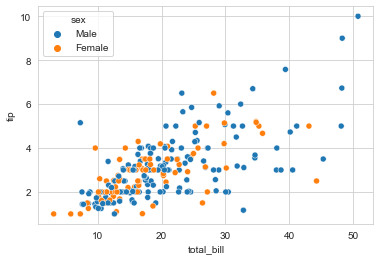

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from pptx import Presentation
from pptx.util import Inches
import io

# Create a new PowerPoint presentation
prs = Presentation()

# Create a title slide
title_slide_layout = prs.slide_layouts[0]
slide = prs.slides.add_slide(title_slide_layout)
title = slide.shapes.title
subtitle = slide.placeholders[1]
title.text = "My Seaborn Plots"
subtitle.text = "Using PPTX Package"

# Create a new slide for each seaborn plot
for i in range(3):
    # Create a new slide
    slide_layout = prs.slide_layouts[6]
    slide = prs.slides.add_slide(slide_layout)
    
    # Generate a seaborn plot
    fig = plt.figure(figsize=(6, 4))
    sns.set_style("whitegrid")
    sns.scatterplot(data=sns.load_dataset("tips"), x="total_bill", y="tip", hue="sex")
    
    # Save the plot to a file
    #fig.savefig(f"plot_{i}.png")
    
    image_stream = io.BytesIO()
    fig.savefig(image_stream)
    
    # Add the plot to the PowerPoint slide
    pic = slide.shapes.add_picture(image_stream, Inches(0.5), Inches(1.5), width=Inches(8), height=Inches(4.5))
    
# Save the PowerPoint presentation to a file
prs.save("seaborn_plots.pptx")
